In [4]:
import numpy as np
from scipy import stats
from scipy.stats.distributions import  t,f
import math
import scipy.stats

## INTERVALOS DE CONFIANZA PARA UNA CANTIDAD DETERMINADA INDIRECTAMENTE
### Welch-Satterthwaite
Intervalos de confianza para una cantidad $q$ determinada indirectamente y que depende de varias cantidades

$$
q = q(x_1,...,x_n)
$$

### Ejemplo:
$$
\rho(a,D,I_A) = \frac{a\pi D^{2}}{4I_A}
$$
renombremos las variables

$x_1 = a$ 

$x_2 = D$

$x_3 = I_A$
$$
\implies q(x_1,x_2,x_3) = \rho(a,D,I_A) 
$$

In [53]:
#Defino las variables x1,x2,x3,....
#------------------------------------------------------------------------
#Variable x1, incertidumbe de x1(sx_bar_1) , grados de libertad de x1
x1= 2.245       #a
sx_bar_1 = 0.002 #delta_a(desviacion estandar de la media)
nu_1 = 18

print('x1=', x1,'\nsx_bar_1=', sx_bar_1, '\nnu_1=', nu_1,'\n--------')
#------------------------------------------------------------------------
#Variable x2, incertidumbe de x2 , grados de libertad de x2
x2= 0.34e-3    #D
sx_bar_2 = 0.01e-3  #delta_D (desviacion estandar de la media) 
nu_2 = 3

print('x2=', x2,'\nsx_bar_2=', sx_bar_2, '\nnu_2=', nu_2,'\n--------')
#------------------------------------------------------------------------
#Variable x3, incertidumbe de x3 , grados de libertad de x3
x3= 171.01e-3        #I_A
sx_bar_3 = 0.01e-3   #delta_I_A (desviacion estandar de la media)
nu_3 = 5

print('x3=', x3,'\nsx_bar_3=', sx_bar_3, '\nnu_3=', nu_3, '\n--------')

x1= 2.245 
sx_bar_1= 0.002 
nu_1= 18 
--------
x2= 0.00034 
sx_bar_2= 1e-05 
nu_2= 3 
--------
x3= 0.17101 
sx_bar_3= 1e-05 
nu_3= 5 
--------


In [54]:
#Defino la funcion q
q = (x1 * np.pi * x2**2 )/(4*x3)
q

1.1919075034280604e-06

La funcion $q$
$$q(x_1,x_2,x_3) = \rho(a,D,I_A)= \frac{x_1\pi x_2^{2}}{4x_3}$$

In [55]:
#Defino la funcion q en Python:
def q(x1,x2,x3):
    return (x1 * np.pi * x2**2 )/(4*x3)
    
q = q(x1,x2,x3) #evaluo la funcion q en x1,x2,x3 y guardo el valor en q
print('q =',q)

q = 1.1919075034280604e-06


Para el caso en que $x_1,...,x_n$ no esten correlacionadas (covarianza nula), la incertidumbre $s_q$

$$
s_q^{2} = c_1^{2}s_{\bar{x}_1}^{2}+...+c_n^{2}s_{\bar{x}_1}^{2}
$$

$c_i$ : coeficientes de sensibilidad(Derivadas parciales)

$$
c_i = \frac{\partial q(x_1,...,x_n)}{\partial x_i} \bigg|_{\bar{x}_1...\bar{x}_n}
$$

Cada una de las incertidumbres $s_{\bar{x}_i}$ esta asociada a $\nu_i$ grados de libertad.

Para definir las derivadas parciales debemos calcularlas, recomiendo usar [Wolfram Alpha (click aquí)](https://www.wolframalpha.com) para este proposito, y es el motivo por el cual redefinimos los nombres de las variables a $x_1, x_2, ... ,x_n$ , aunque podriamos usar $x_1=x$ , $x_2=y$ , $x_3=z$ 
La funcion $q$
$$q(x,y,z) = \rho(a,D,I_A)= \frac{x\pi y^{2}}{z}$$

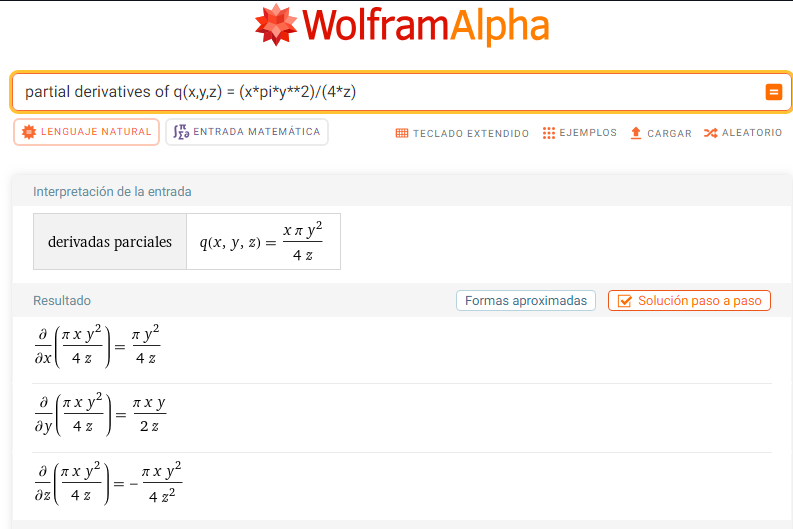

In [56]:
#Definimos las funciones Derivadas Parciales coeficientes de sensibilidad 
#Derivada parcial de dq/dx1
def c1(x1,x2,x3):
    return (np.pi * x2**2) /(4*x3)
c1 = c1(x1,x2,x3)  #evaluo la funcion c1 en x1,x2,x3 y guardo el valor en c1 
print('c1 = ',c1)

#Derivada parcial de dq/dx2
def c2(x1,x2,x3):
    return (np.pi * x1*x2) /(2*x3)
c2 = c2(x1,x2,x3)  #evaluo la funcion c1 en x1,x2,x3 y guardo el valor en c1 
print('c2 = ',c2)    

#Derivada parcial de dq/dx3
def c3(x1,x2,x3):
    return -(np.pi * x1*x2**2) /(4*x3**2)
c3 = c3(x1,x2,x3)  #evaluo la funcion c1 en x1,x2,x3 y guardo el valor en c1 
print('c3 = ',c3)
    

c1 =  5.30916482596018e-07
c2 =  0.007011220608400355
c3 =  -6.969811726963689e-06


$$
s_q^{2} = c_1^{2}s_{\bar{x}_1}^{2}+...+c_n^{2}s_{\bar{x}_1}^{2}
$$

In [57]:
sq2 = c1**2 * sx_bar_1**2 + c2**2 * sx_bar_2**2 +c3**2 * sx_bar_3**2
print('sq2=', sq2)

sq2= 4.916853789039305e-15


$$
s_q = \sqrt{c_1^{2}s_{\bar{x}_1}^{2}+...+c_n^{2}s_{\bar{x}_1}^{2}}
$$

In [58]:
sq = np.sqrt(sq2)
print('sq=', sq)

sq= 7.012028086822888e-08


### Formula de Welch-Satterthwaite
$$
\nu_{ef} = \frac{s_q^{4}}{\frac{c_1^{4}s_{\bar{x}_1}^{4}}{\nu_1} + \frac{c_2^{4}s_{\bar{x}_2}^{4}}{\nu_2}+...+ \frac{c_n^{4}s_{\bar{x}_n}^{4}}{\nu_1}}
$$

Para nuestro ejemplo y con covarianza nula:
$$
\nu_{ef} = \frac{s_q^{4}}{\frac{c_1^{4}s_{\bar{x}_1}^{4}}{\nu_1} + \frac{c_2^{4}s_{\bar{x}_2}^{4}}{\nu_2}+ \frac{c_3^{4}s_{\bar{x}_3}^{4}}{\nu_3}}
$$

In [59]:
#Grados de libertad efectivos:
nu_ef = sq**4/(((c1**4*sx_bar_1**4)/nu_1) + ((c2**4*sx_bar_2**4)/nu_2) + ((c3**4*sx_bar_3**4)/nu_3))
print('vef=', nu_ef)
print('grados de libertad efectivos vef(redondeado a entero) =', int(nu_ef))

vef= 3.001382245854698
grados de libertad efectivos vef(redondeado a entero) = 3


Conocidos los grafos de libertad efectivos $\nu_{ef}$ podemos calcular el intervalo de confianza asociado a $q$ , el cual para un nivel de significancia $\alpha$ esta dado por:
    $$\bar{q} \pm t_{\frac{\alpha}{2}, \nu_{ef}}s_q$$

In [60]:
# Defino nivel alpha, t_(alpha/2, nu_ef)
alpha = 0.05
print('alpha = ', alpha)
sT = t.ppf(1.0 - alpha/2.0, nu_ef) #t  de Student
print('t_(alpha/2, nu_ef) = ', sT)

alpha =  0.05
t_(alpha/2, nu_ef) =  3.181617326686992


In [61]:
t_sq = sT*sq
print('q =',q, '\nt*sq=', t_sq)
print('------------------------------------------------------')
print('Intervalo de confianza al '+str((1-alpha)*100)+'%:')
print('q: {:5.3e} ± {:5.3e}'.format(q , t_sq))

q = 1.1919075034280604e-06 
t*sq= 2.2309590056251538e-07
------------------------------------------------------
Intervalo de confianza al 95.0%:
q: 1.192e-06 ± 2.231e-07


### FIN